In [1]:
import pandas as pd
import os
from unicodedata import normalize
import re
import math as m
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go
from PIL import Image
import kaleido

In [4]:
path01 = 'YOUR_PATH'
path02 = 'YOUR_PATH'
path03 = 'YOUR_PATH'
path04 = 'YOUR_PATH'
path_plot = path04+'generated/'

In [ ]:
df_s2 = pd.read_csv(path02+'imported_cases_s2_pre_sum.csv',sep=',')
df_s3 = pd.read_csv(path02+'imported_cases_s3_pre_sum.csv',sep=',')

In [6]:
df_s2.columns

Index(['region_origin_code', 'region_destination_code', 'travel_scenario_2',
       'travel_scenario_2sim', 'prevalence_mid', 'prevalence_low',
       'prevalence_high', 'expected_imported_cases_scenario_2_mid',
       'expected_imported_cases_scenario_2_low',
       'expected_imported_cases_scenario_2_high',
       'expected_imported_cases_scenario_2sim_mid',
       'expected_imported_cases_scenario_2sim_low',
       'expected_imported_cases_scenario_2sim_high'],
      dtype='object')

In [ ]:
dfs2 = df_s2.groupby(['region_origin_code','region_destination_code']).mean()[['expected_imported_cases_scenario_2_mid','expected_imported_cases_scenario_2_low','expected_imported_cases_scenario_2_high',
       'expected_imported_cases_scenario_2sim_mid','expected_imported_cases_scenario_2sim_low','expected_imported_cases_scenario_2sim_high']].reset_index()


In [ ]:
dfs3 = df_s3.groupby(['region_origin_code','region_destination_code']).mean()[['expected_imported_cases_scenario_3_mid','expected_imported_cases_scenario_3_low','expected_imported_cases_scenario_3_high',
       'expected_imported_cases_scenario_3sim_mid','expected_imported_cases_scenario_3sim_low','expected_imported_cases_scenario_3sim_high']].reset_index()


In [9]:
dict_regiones2 = {
    1:'Tarapacá',
    2:'Antofagasta',
    3:'Atacama',
    4:'Coquimbo',
    5:'Valparaíso',
    6:'''O'Higgins''' ,
    7:'Maule',
    8:'Biobio',
    9:'La Araucania',
    10:'Los Lagos',
    11:'Aysen',
    12:'Magallanes',
    13:'Metropolitana',
    14:'Los Rios',
    15:'Arica y Parinacota',
    16:'Ñuble'
}



dict_colores = {
    1:'#C8874D',
    2:'#B7B8AF',
    3:'#9BC84D',
    4:'#84A66E',
    5:'#89E1E1',
    6:'#C84D4D',
    7:'#4DA6C8',
    8:'#924DC8',
    9:'#5A4DC8',
    10:'#4D7FC8',
    11:'#C84DC2',
    12:'#C84D8B',
    13:'#4DC894',
    14:'#63C84D',
    15:'#4DC8C2',
    16:'#C8BF4D'
}

dfs2['color'] = '0'
for i,j in enumerate(dfs2.region_origin_code.unique()):
    dfs2.loc[dfs2.region_origin_code==j,'color'] = dict_colores.get(j)

dfs3['color'] = '0'
for i,j in enumerate(dfs3.region_origin_code.unique()):
    dfs3.loc[dfs3.region_origin_code==j,'color'] = dict_colores.get(j)

# GENERATE PLOTLY PLOT

In [79]:
#SCENARIO 2 y 3

# override gray link colors with 'source' colors
opacity = 0.3
position_A = dfs2.region_origin_code.unique().tolist()
position_B = (dfs2.region_destination_code.unique()+100).tolist()
position_C = [200]
position_D = (dfs3.region_origin_code.unique()+300).tolist()
position_E = (dfs3.region_destination_code.unique()+400).tolist()
position_list = position_A + position_B + position_C + position_D + position_E

label_A = dfs2.region_origin_code.map(dict_regiones2).unique().tolist()
label_B = dfs2.region_destination_code.map(dict_regiones2).unique().tolist()
label_C = ['']*len(position_C)
label_D = dfs3.region_origin_code.map(dict_regiones2).unique().tolist()
label_E = dfs3.region_destination_code.map(dict_regiones2).unique().tolist()

color_A = dfs2.region_origin_code.map(dict_colores).unique().tolist()
color_B = dfs2.region_destination_code.map(dict_colores).unique().tolist()
color_C = ['white']*len(position_C)
color_D = dfs3.region_origin_code.map(dict_colores).unique().tolist()
color_E = dfs3.region_destination_code.map(dict_colores).unique().tolist()

values_AB = dfs2.expected_imported_cases_scenario_2_mid.to_list()
values_BC = [0.00001]*len(position_B)
values_CD = [0.00001]*len(position_B)
values_DE = dfs3.expected_imported_cases_scenario_3_mid.to_list()

sources_AB = [position_list.index(x) for x in dfs2.region_origin_code.to_list()]
sources_BC = [position_list.index(x) for x in (dfs2.region_destination_code.unique()+100).tolist()]
sources_CD = [position_list.index(x) for x in [200]*dfs3.region_destination_code.unique().size]
sources_DE = [position_list.index(x) for x in (dfs3.region_origin_code+300).to_list()]

targets_AB = [position_list.index(x) for x in (dfs2.region_destination_code+100).to_list()]
targets_BC = [position_list.index(x) for x in [200]*dfs2.region_destination_code.unique().size]
targets_CD_aux = [position_list.index(x) for x in (dfs3.region_origin_code.unique()+300).tolist()]
targets_CD = targets_CD_aux if len(sources_CD)==len(targets_CD_aux) else targets_CD_aux+[position_list.index(200)]*(len(sources_CD)-len(targets_CD_aux))
targets_DE = [position_list.index(x) for x in (dfs3.region_destination_code+400).to_list()]


position_list_label = label_A + label_B + label_C + label_D + label_E
node_color_list = color_A + color_B + color_C + color_D + color_E
values_list = values_AB + values_BC + values_CD + values_DE
sources_list = sources_AB + sources_BC + sources_CD + sources_DE
targets_list = targets_AB + targets_BC + targets_CD + targets_DE

fig = go.Figure(data=[go.Sankey(
    valueformat = ".4f",
    valuesuffix = " Casos",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "white", width = 0.5),
      label =  position_list_label,
      color =  node_color_list
    ),
    # Add links
    link = dict(
      source = sources_list,
      target = targets_list,
      value =  values_list,
      #label =  [str(x)+'_'+str(y) for x,y in zip(sources_list,targets_list)],
      color =  dfs2.color.to_list()+['white']*len(position_B)+['white']*len(position_E)+dfs3.color.to_list()
))])

fig.update_layout(title_text="   Imported Cases for First Interventions Scenario                                                                                                     Imported Cases for Total Lockdown Scenario",
                  font_size=14,width=1800, height=1000)
#fig.tight_layout()
fig.show()
#fig.write_image(path_plot+'imported_cases_s2s3.svg')

# WRITE IMAGE TO FILES

In [80]:
fig.write_image(path_plot+'imported_cases_s2s3_sep.png',width=1800, height=1000,scale=6)

# READ IMAGE AND FIX THE SPACE

In [ ]:
from PIL import Image

# Define the input and output image paths
input_image_path = path_plot + 'imported_cases_s2s3_sep.png'
output_image_path = path_plot + 'imported_cases_s2s3.png'

# Load the input PNG image
def find_chart_boundaries(image):
    width, height = image.size
    left_boundary = 0
    right_boundary = width

    # Find the left boundary
    for x in range(width):
        column = image.crop((x, 0, x + 1, height))
        col_uniq_array = np.unique(np.array(column).flatten())
        if col_uniq_array.size == 1 and col_uniq_array[0]==255:
            left_boundary = x - 100
        else:
            break

    # Find the right boundary
    for x in range(width - 1, -1, -1):
        column = image.crop((x, 0, x + 1, height))
        col_uniq_array = np.unique(np.array(column).flatten())
        if col_uniq_array.size == 1 and col_uniq_array[0]==255:
            right_boundary = x + 100
        else:
            break

    return left_boundary, right_boundary

with Image.open(input_image_path) as img:
    img_gray = img.convert('L')
    # Find the boundaries of the charts
    left_boundary_1, right_boundary_2 = find_chart_boundaries(img_gray)
    left_boundary_2, not_use = find_chart_boundaries(img_gray.crop((img_gray.width // 2, 0, img_gray.width, img_gray.height)))
    not_use, right_boundary_1 = find_chart_boundaries(img_gray.crop((0, 0, img_gray.width // 2, img_gray.height)))
    left_boundary_2 = img_gray.width // 2 + left_boundary_2

    # Crop the two charts
    first_chart = img.crop((left_boundary_1, 0, right_boundary_1, img.height))
    second_chart = img.crop((left_boundary_2, 0, right_boundary_2, img.height))

    # Create a new blank image with the combined width
    combined_width = first_chart.width + second_chart.width
    combined_height = max(first_chart.height, second_chart.height)
    combined_image = Image.new('RGBA', (combined_width, combined_height))

    # Paste the first chart and the second chart onto the new image with some space in between
    combined_image.paste(first_chart, (0, 0))
    combined_image.paste(second_chart, (first_chart.width, 0))  # Adjust the space as needed

    # Save the combined image as PNG without losing quality
    combined_image.save(output_image_path, 'PNG', quality=100)

print("Image processing complete. Saved as", output_image_path)


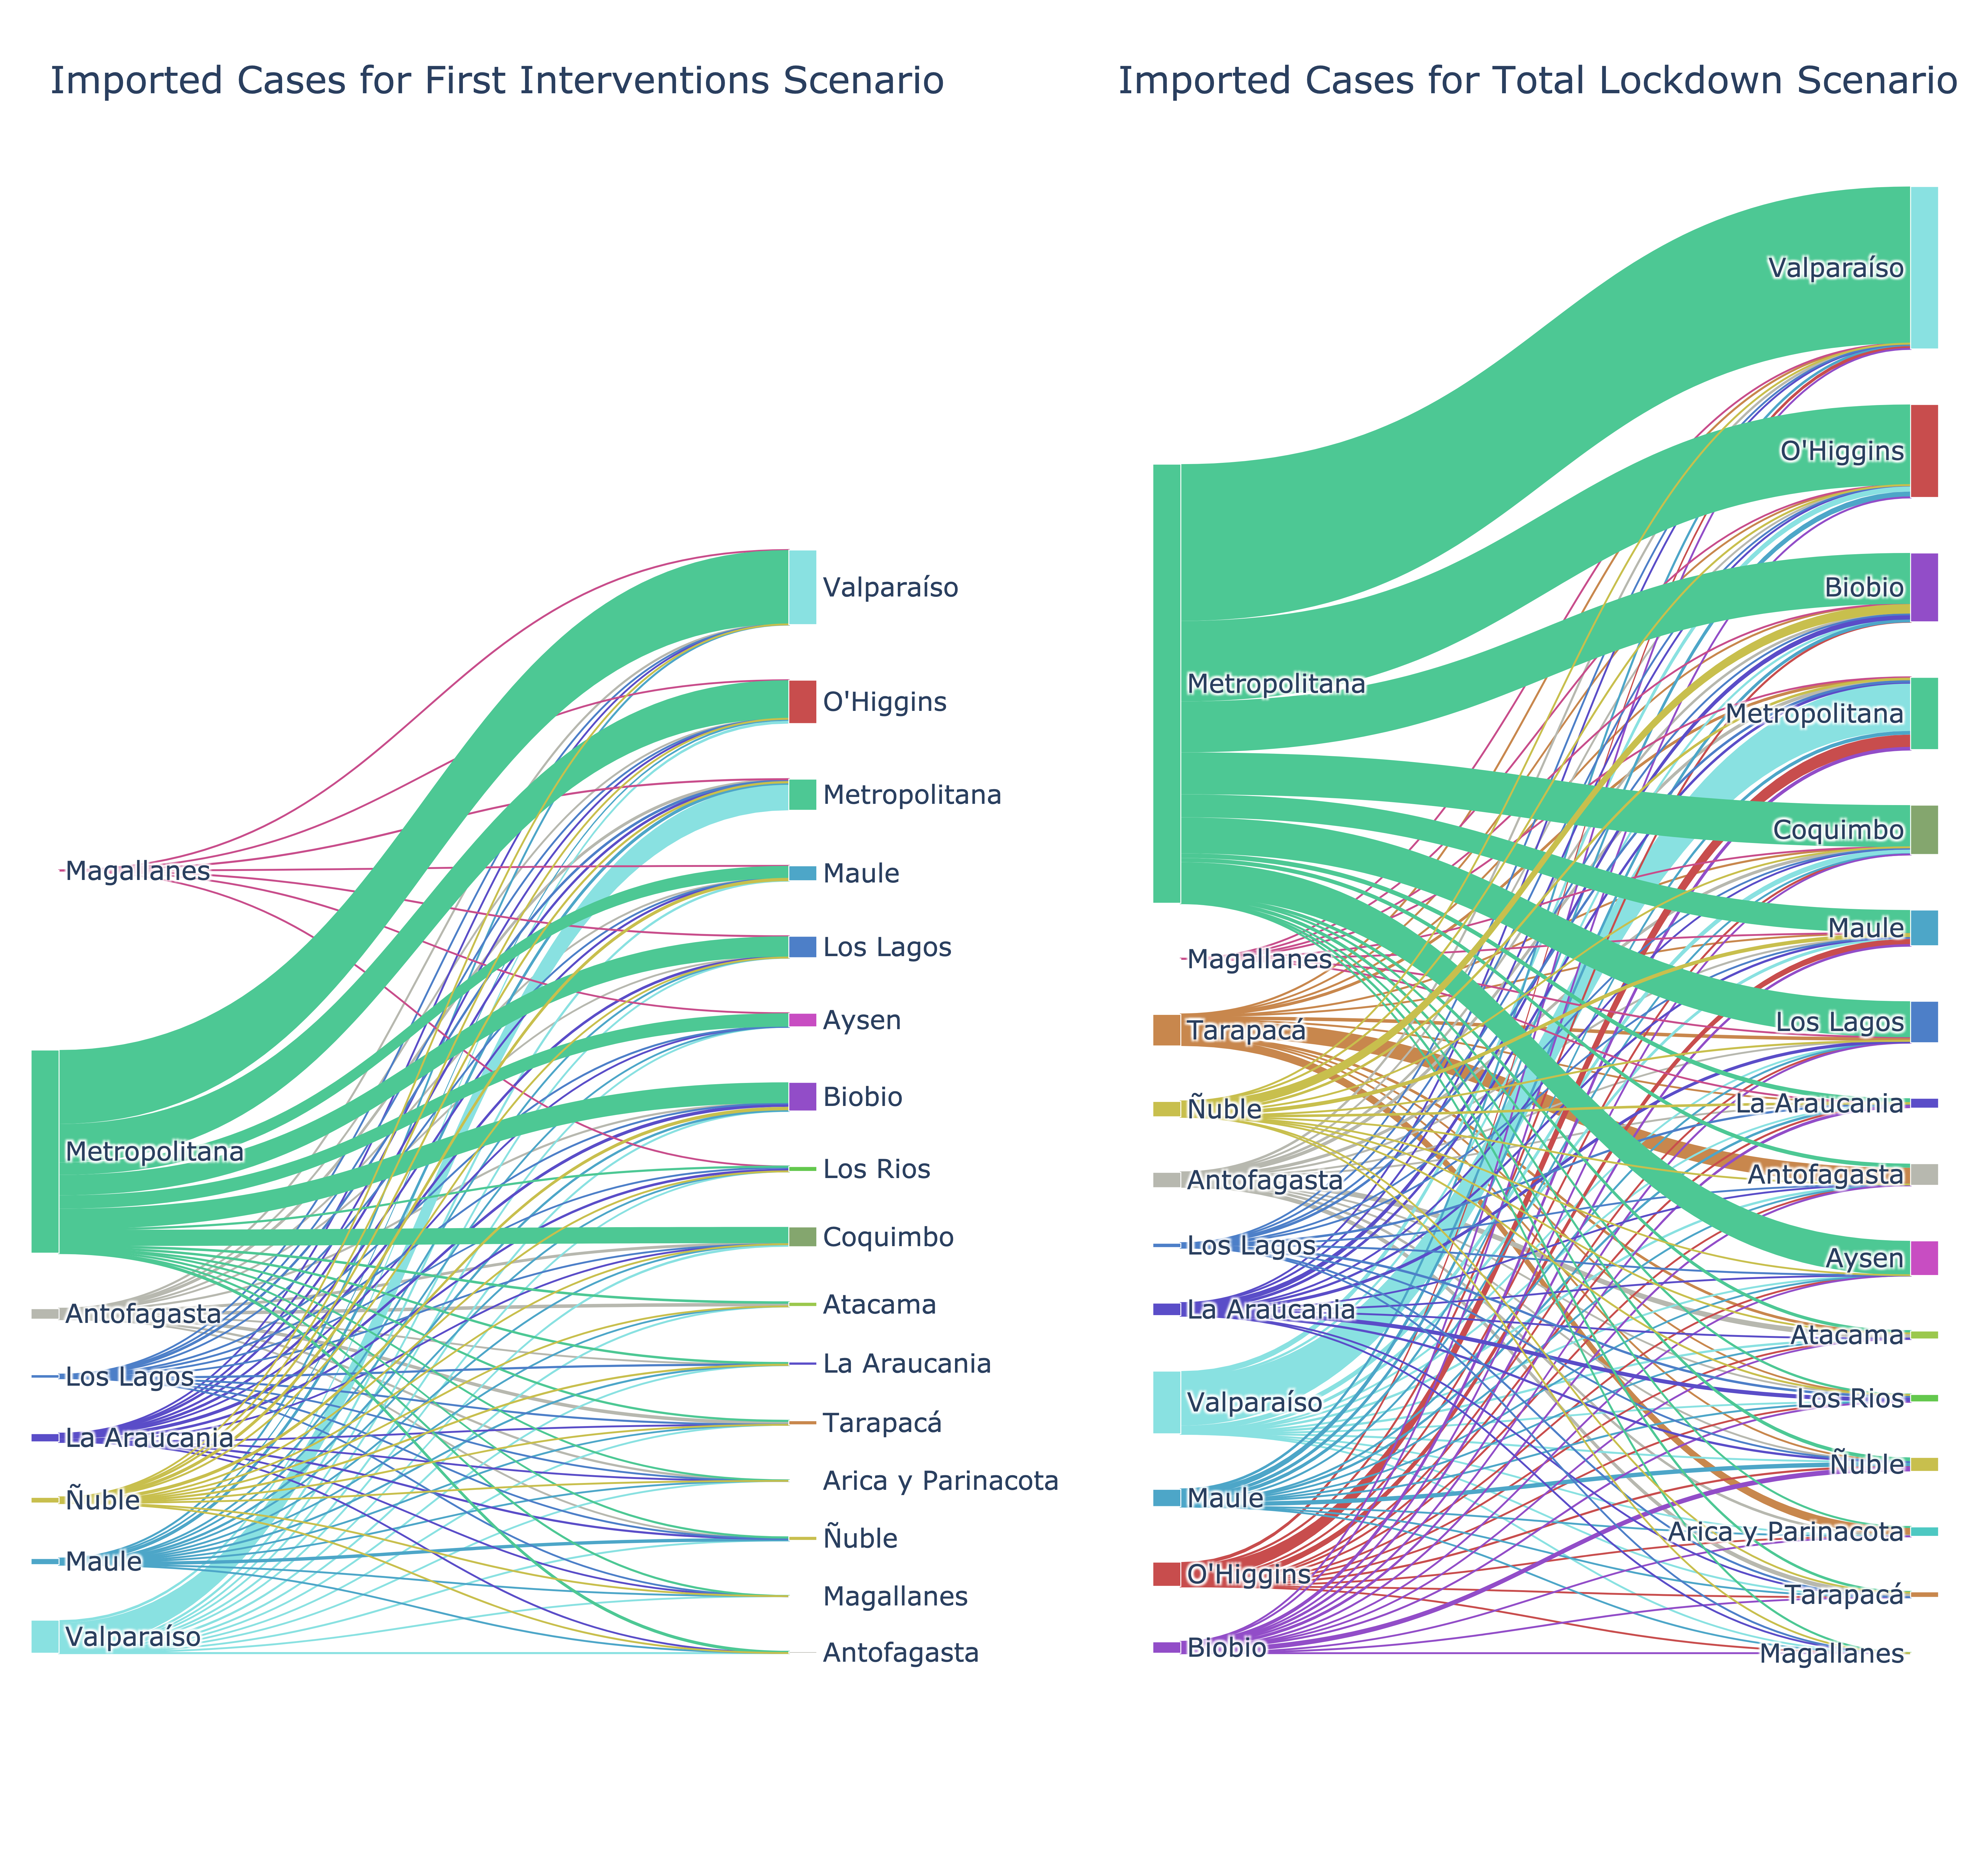

In [82]:
combined_image

In [71]:
width, height = img_gray.size
left_boundary = 0
right_boundary = width

# Find the left boundary
for x in range(width):
    column = img_gray.crop((x, 0, x + 1, height))
    col_uniq_array = np.unique(np.array(column).flatten())
    if col_uniq_array.size == 1 and col_uniq_array[0]==255:
        left_boundary = x
    else:
        break